In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import types

class LinearModel:
    def __init__(self, coef = []):
        self.coef = coef;
    
    def getValue(self, point = []):
        return self.coef[0] + np.dot(self.coef[1:len(self.coef)],point);          


In [2]:
class InputData:
    
    def getDataFromCsv(self, csv_file, icol = None):
        self.df = pd.DataFrame(pd.read_csv(csv_file, index_col = icol));
    
    def printData(self):
        print(self.df);
        
    def describeData(self):
        print(self.df.describe());
        
    def scatterData(self):
        pd.plotting.scatter_matrix(self.df,figsize=(10,10));
        
    def dataColumns(self):
        print(self.df.columns);
        
    def chooseResp(self, col = 1):
        return self.df.iloc[:,col-1].values;
    
    def choosePred(self, col = []):
        col = np.array([col]).flatten()
        return self.df.iloc[:,[t - 1 for t in col]].values;
    
    def sortData(self, name_col):
        print(self.df.sort_values(by=name_col,ascending=1));
            
class InputDataTest:
    def __init__(self,file):
        data = InputData();
        data.getDataFromCsv(file, icol = 0);
        data.dataColumns();
        data.printData();
        data.describeData();
        data.scatterData();
        y = data.chooseResp(1);
        x = data.choosePred(2);


In [3]:
class matrixTools:
    
    def arrayToVandermonde(self,x,n):
        X = np.zeros((len(x),n));
        X[:,0] = x.transpose();
        for i in range(1,n):
            X[:,i] = X[:,i-1]*X[:,0];
        
        return X;

In [4]:
class LogisticRegression:
    
    def __init__(self,X,y,method = 'GD2'):
        
        self.numrows = len(y);
        
        self.X = np.c_[np.ones(self.numrows),X].T;
        self.y = y.T;
        
        self.beta = np.zeros((self.X.shape[0],1));
        self.method = method;
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z));
    
    def costFunction(self, h):
        return np.mean( -self.y*np.log(h) - (1-self.y)*np.log(1-h) );
    
    def gradientFunction(self,h):
        return np.dot(h-self.y,self.X.T).T;

    def hessianMatrix(self,h):
        W = np.diag((h*(1-h)).flatten());
        step1 = np.dot(self.X,W);
        final = np.dot(step1,self.X.T);
        return final;
    
    def GD1(self, alpha = 0.0001, tol = 1e-10):
        
        z = np.dot(self.beta.T,self.X);
        h = self.sigmoid(z);
        cf = self.costFunction(h);
        numiter = 1;
        dif = 1;
        
        
        while (abs(dif) > tol and numiter < 1e6):
            cfaux = cf;
            self.beta = self.beta - (alpha*self.gradientFunction(h));
            z = np.dot(self.beta.T,self.X);
            h = self.sigmoid(z);
            cf = self.costFunction(h);
            dif = cfaux - cf;
            numiter += 1;
            
        print(self.beta)
        print(numiter)
    
    
    
    def GD2(self, tol = 1e-16):
        
        z = np.dot(self.beta.T,self.X);
        h = self.sigmoid(z);
        numiter = 1;
        dif = 1;
        
        while (abs(dif) > tol and numiter < 1e8):
            oldbeta = self.beta;
            self.beta = self.beta - np.dot(np.linalg.inv(self.hessianMatrix(h)),self.gradientFunction(h));
            z = np.dot(self.beta.T,self.X);
            h = self.sigmoid(z);
            dif = (sum((oldbeta - self.beta)**2))**.5;
            numiter += 1;
         
        print(self.beta)
        print(numiter)
        
        
    def SGD(self, alpha = .01, tol = 1e-10):
        
        i = np.random.choice(np.arange(self.numrows),1);
        z = self.beta*self.X[:,i];
        h = self.sigmoid(z);
        
        cf = self.costFunction(h);
        numiter = 1;
        dif = 1;
        
        
        while (abs(dif) > tol and numiter < 1e5):
            cfaux = cf;
            
            np.apply_along_axis(np.random.shuffle,0,self.X.T);
            x = np.random.shuffle(self.X.T);

            self.beta = self.beta + (alpha*self.y[i]*self.X[:,i]*(h-self.y));
            z = self.beta*self.X[:,i];
            h = self.sigmoid(z);
            cf = self.costFunction(h);
            dif = cfaux - cf;
            numiter += 1;
            
        
        print(self.beta)
        print(numiter)
    
    
    def fit(self):
        
        if self.method == 'GD1':
            self.GD1();
                                     
        if self.method == 'GD2':
            self.GD2();     
            
        if self.method == 'SGD':
            self.SGD();
            
    def predict(self,x):
        z = self.beta[0] + np.dot(x,self.beta[1:len(self.beta)]);
        return self.sigmoid(z);
    
    def plot(self):
        minimum = self.X.min(axis = 1);
        maximum = self.X.max(axis = 1);
        x = np.arange(minimum[1],maximum[1],.1)
        xu =  np.c_[np.ones(len(x)),x];
        z = np.dot(xu,self.beta);
        plt.plot(x,self.sigmoid(z));
        

[[-9.03178099]
 [ 0.20226398]]
646590
[0.89019534]


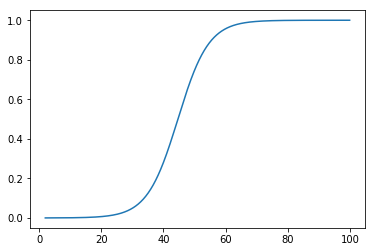

In [5]:
class LogisticRegressionTest:
     def __init__(self):
        data = InputData();
        data.getDataFromCsv('DateRegresie/logistic_test1.csv', icol = 0);
        x = data.choosePred(1);
        y = data.chooseResp(2);
        #X = matrixTools().arrayToVandermonde(x,2);
        lr = LogisticRegression(x,y,'GD2');
        lr.fit();
        print(lr.predict([55]));
        lr.plot();

LogisticRegressionTest();

In [79]:
from sklearn.linear_model import LogisticRegression

data = InputData();
data.getDataFromCsv('DateRegresie/logistic_test1.csv', icol = 0);
x = data.choosePred(1);
y = data.chooseResp(2);

clf = LogisticRegression(random_state=0, solver='newton-cg').fit(x, y);
print(clf.coef_)
print(clf.intercept_)
print(clf.n_iter_)
clf.predict_proba([[55]])

[[0.20274146]]
[-9.05758186]
[12]


array([[0.10975964, 0.89024036]])